#ML Telescope Particle Classification

This ML exercise is based on the YTBE video by Kylie Ying's Machine Learning for Everybody course
https://www.youtube.com/watch?v=i_LwzRVP7bg

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

Data for this example was taken from here, its licensed under creative commons by 4.0: Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [2]:
labels = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
dataSet = pd.read_csv('magic04.data', names=labels)
dataSet["class"] = (dataSet["class"] == "g").astype(int)
dataSet["fArea"] = (dataSet['fWidth']*dataSet['fLength'])
dataSet["fDist_Alpha"] = dataSet["fDist"] * dataSet["fAlpha"]
dataSet.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,fArea,fDist_Alpha
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1,460.807673,3282.845218
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1,370.504805,1305.644695
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1,22044.095612,19762.404480
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1,227.997292,1219.784913
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1,2323.248872,1656.835376


loads data into a var, remember to add labels, classifies based on class:

G = 1

H = 0

#Validation, Training, DataSets

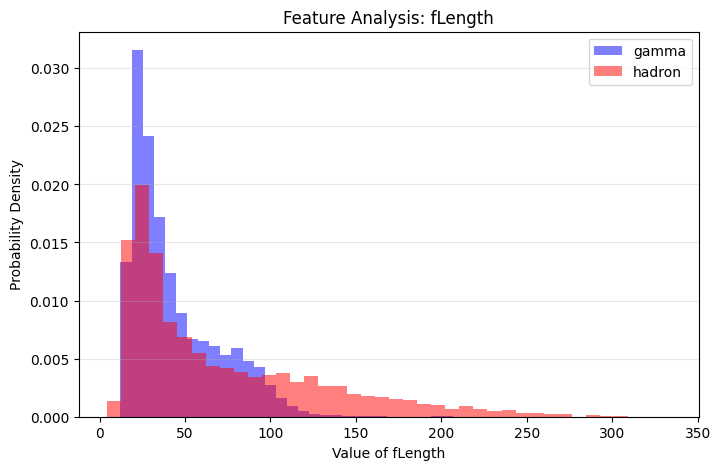

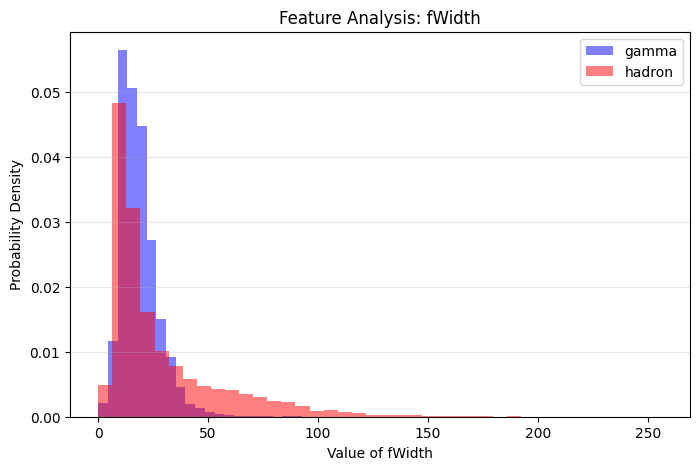

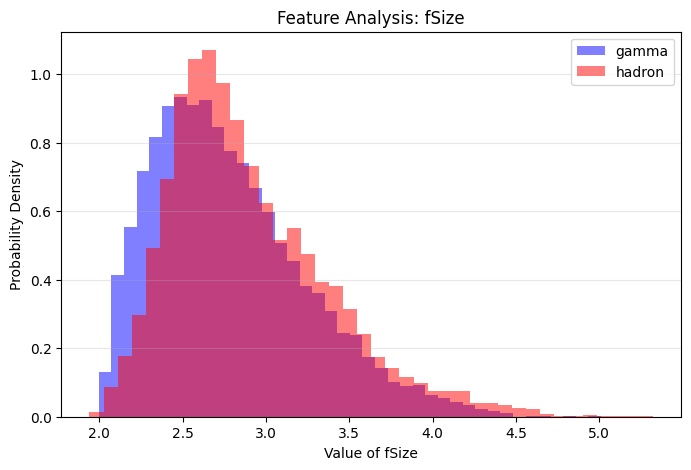

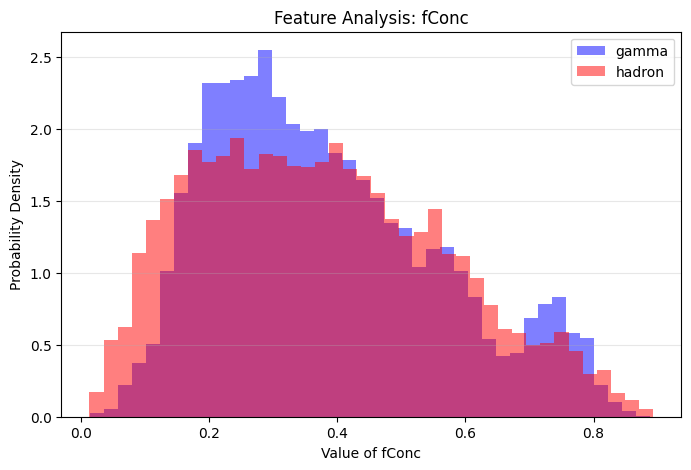

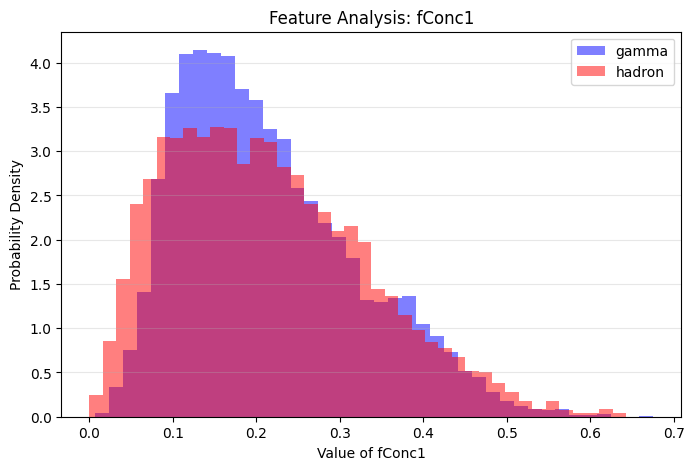

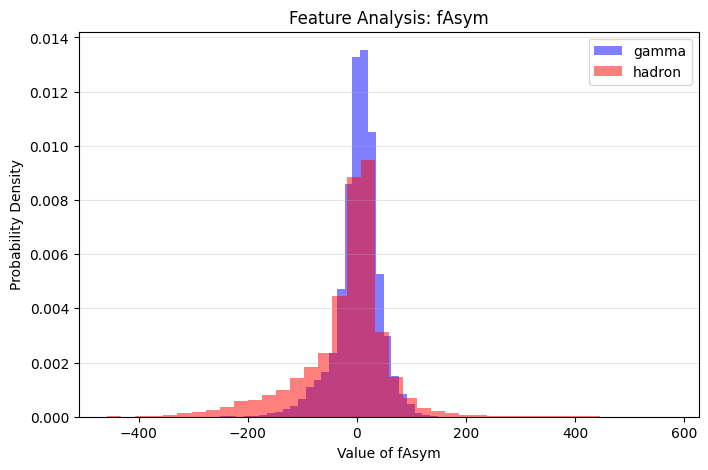

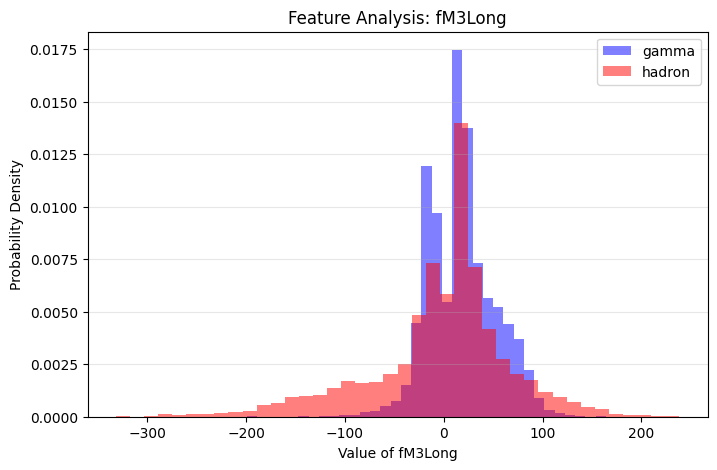

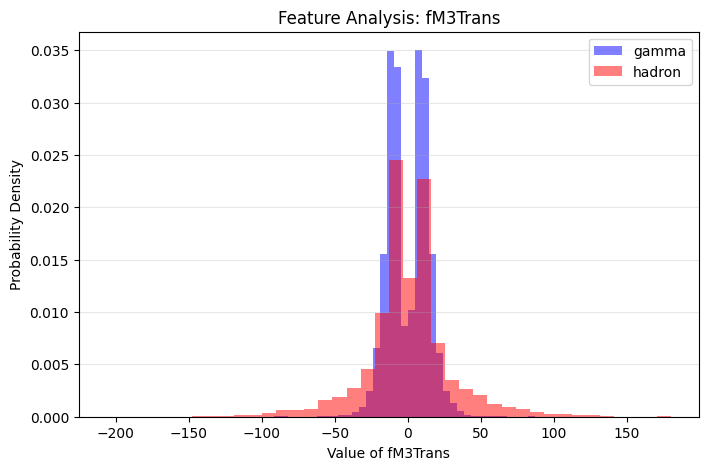

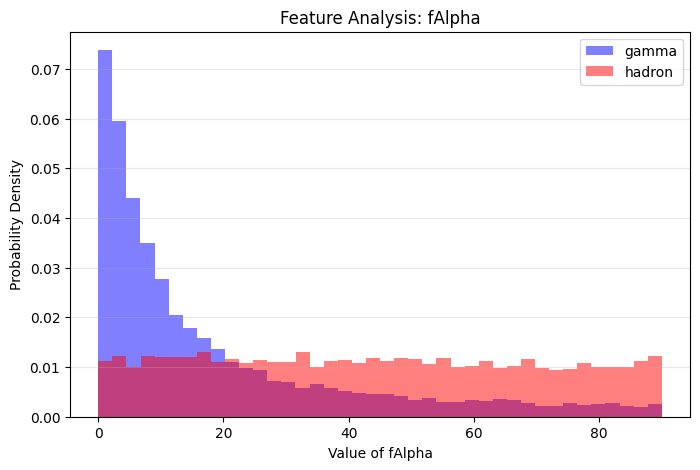

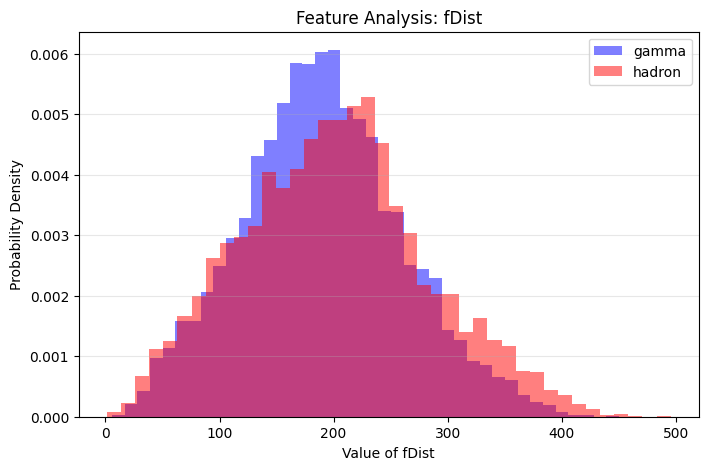

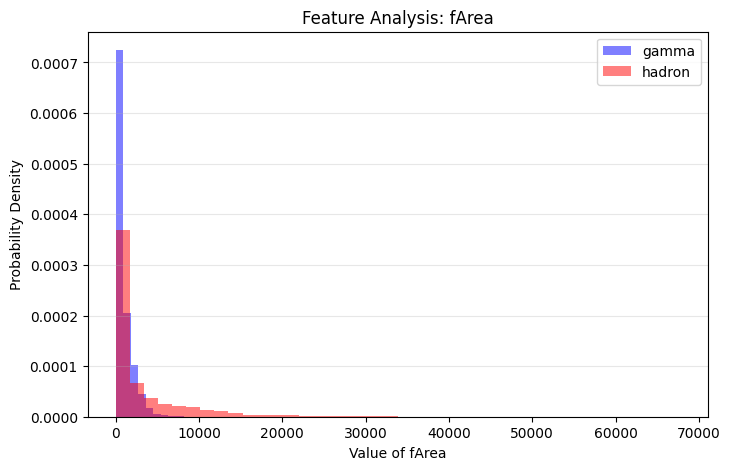

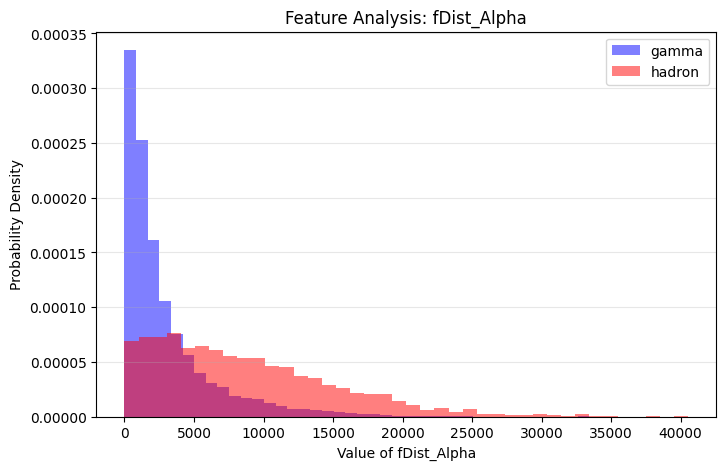

In [3]:
dataSet.replace([np.inf, -np.inf], np.nan, inplace=True)
dataSet.fillna(dataSet.median(), inplace=True) # Fill gaps with the median
features = dataSet.columns.drop('class')
for data in features:
    plt.figure(figsize=(8, 5))
    plt.hist(dataSet[dataSet['class']==1][data], color='blue', label='gamma', alpha=0.5, density=True, bins=40)
    plt.hist(dataSet[dataSet['class']==0][data], color='red', label='hadron', alpha=0.5, density=True, bins=40)

    plt.title(f"Feature Analysis: {data}")
    plt.xlabel(f"Value of {data}")
    plt.ylabel("Probability Density")
    plt.grid(axis='y', alpha=0.3)
    plt.legend()
    plt.show()

In [4]:
dataSet = dataSet.sample(frac=1).reset_index(drop=True)

train_end = int(0.6 * len(dataSet))
valid_end = int(0.8 * len(dataSet))


train = dataSet.iloc[:train_end]
valid = dataSet.iloc[train_end:valid_end]
test = dataSet.iloc[valid_end:]

print(type(train)) # Verify this says <class 'pandas.core.frame.DataFrame'>


<class 'pandas.DataFrame'>


In [5]:
def scaleDataSet(dataframe, oversample=False):
    X = dataframe.drop(columns=['class']).values
    y = dataframe['class'].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    data = np.hstack([X, np.reshape(y, (-1, 1))])

    return data, X, y



In [6]:
train, xTrain, yTrain = scaleDataSet(train,oversample=True)
valid, xValid, yValid = scaleDataSet(valid,oversample=False)
test, xTest, yTest = scaleDataSet(test,oversample=False)

#K Nearest Neightbors:
Essentially, lets use a X and Y graph, what it does is, lets say we want to find whether X=10 Y=10 is a Gamma or a Hadron, so what do we do?

We find the nearest N number of neighbors, closest to the point we are investigating, and do the distance equation:


SQRT((x1-x2)^2+(y1-y2)^2))

Then we figure out which value is the value of the mayority of neighbors, so if 8 out of the 10 neighbors of (10,10) are hadrons, there is a high chance (10,10) is also a hadron, this ofc can be scaled up to N number of dimensions we need to process, in this case, it would be a 10 dimensional K Nearest Neighbor

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [8]:
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(xTrain,yTrain)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [9]:
yPred = knnModel.predict(xTest)

In [10]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1366
           1       0.85      0.85      0.85      2438

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes
Used to guess the posibility of X given Y, so like calculate what is the chance of an 'P' person having covid, and getting a false positive or a false negative, after taking a test, based on historic data

Essentially it just multiplies all of the individual probabilities

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
nbModel = GaussianNB().fit(xTrain,yTrain)
yPred = nbModel.predict(xTest)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.76      0.47      0.58      1366
           1       0.76      0.92      0.83      2438

    accuracy                           0.76      3804
   macro avg       0.76      0.69      0.70      3804
weighted avg       0.76      0.76      0.74      3804



#Logistic Regression
Draw a plot, put a line somewhere, that line divides the class types, that is the basis of classification, but that doesnt work for data which isnt clear cut, a 0,3 or a 0,1 would break that, so what do we do? we essentially bend the line into an S or a sigmoid, so it allows you to fine tune it with a bunch of parameters to get better results

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logModel = LogisticRegression().fit(xTrain,yTrain)
yPred = logModel.predict(xTest)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71      1366
           1       0.83      0.85      0.84      2438

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



#Support Vector Machine
Find a line somewhere in a graph, that best separates data, its what you usually do when you are explaining what a classification ML does, if it takes more axis now we have plane.
How close the line is to the closest data matters here, you want it on the dead center of the 2 groups

Not as good as dealing with outliers or weird data, even if they are the only outliers

It works with single dimension data tho, which is poggers

SVC = Support Vector Classifier

In [15]:
from sklearn.svm import SVC

In [16]:
svcModel = SVC().fit(xTrain,yTrain);
yPred = svcModel.predict(xTest);
print(classification_report(yTest,yPred));

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1366
           1       0.88      0.89      0.89      2438

    accuracy                           0.85      3804
   macro avg       0.84      0.83      0.84      3804
weighted avg       0.85      0.85      0.85      3804



#NEURALS NETS
The cool ones, one input layers, N number of hidden layer neurons, and the output

You give inputs, the inputs are modified by the neuron,for as many neurons there are, and all the neurons are added on every neuron, then gets biased before getting output

It uses an activation function to get an altered state of the value, instead of a linear sum of all the inputs + neuron value.

Works by generation, you can train this one by giving it the Loss Value, the goal is to reduce it as much as you can.

You run it, you get the old values, and sum it by an alpha, or a learning rate/how quickly you take steps, and that gives the new values to modify on the neurons


In [17]:
import tensorflow as tf
import optuna
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print(f"Success! Found GPU: {gpu_devices[0]}")
    # This prevents TensorFlow from hogging all 4GB of VRAM immediately
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print("GPU not found. System is defaulting to CPU.")

2026-02-06 17:03:04.875816: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-06 17:03:04.921748: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-06 17:03:05.836563: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Success! Found GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


/home/javie/ML/magic-gamma-telescope/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
print("Built with CUDA:", tf.test.is_built_with_cuda())


with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.1, 2.1], [3.1, 4.1]])
    c = tf.matmul(a, b)

print("\nMatrix multiplication successful on GPU:")
print(c)




I0000 00:00:1770418986.463800   13667 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5561 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Built with CUDA: True

Matrix multiplication successful on GPU:
tf.Tensor(
[[ 7.2999997 10.299999 ]
 [15.7       22.699999 ]], shape=(2, 2), dtype=float32)


In [19]:
xTrain = xTrain.astype('float32')
xValid = xValid.astype('float32')
xTest = xTest.astype('float32')
yTrain = yTrain.astype('float32')
yValid = yValid.astype('float32')
yTest = yTest.astype('float32')
def trainModel(xTrain,yTrain,xvalid,yvalid,numNodes,dropoutProb,lr,batchSize,epochs,trial = None):
  early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30,restore_best_weights=True)
  reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
  callbacks = [early_stop,reduce_lr]
  if trial is not None:
    callbacks.append(optuna.integration.TFKerasPruningCallback(trial, 'val_loss'))
    
    
  neuralNetModel = tf.keras.Sequential([
      tf.keras.Input(shape=(xTrain.shape[1],)),

      tf.keras.layers.Dense(numNodes,activation='relu'),
      tf.keras.layers.Dropout(dropoutProb),

      tf.keras.layers.Dense(numNodes,activation='relu'),
      tf.keras.layers.Dropout(dropoutProb),
      

      tf.keras.layers.Dense(numNodes,activation='relu'),
      tf.keras.layers.Dropout(dropoutProb),
      
      tf.keras.layers.Dense(1,activation='sigmoid')
    ])
  neuralNetModel.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history = neuralNetModel.fit(
        xTrain, yTrain,
        epochs=epochs, 
        batch_size=batchSize,
        validation_data=(xvalid, yvalid), 
        verbose=0, 
        callbacks=callbacks
    )
  return neuralNetModel, history


In [20]:
def evaluate_best_params(trial):
  num_nodes = trial.suggest_int('num_nodes', 128, 512, step=64)
  dropout_prob = trial.suggest_float('dropout_prob', 0.3, 0.6)
  lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
  batch_size = trial.suggest_categorical('batch_size', [128,256, 512])
  epochs = 100

  use_dist_alpha = trial.suggest_categorical('use_dist_alpha',[True,False])
  use_area = trial.suggest_categorical('use_area', [True, False])
  
  keep_idx = list(range(xTrain.shape[1]))
  
    
  if not use_dist_alpha:
    keep_idx.remove(11)
  if not use_area:
    keep_idx.remove(10) 


  xt = xTrain[:, keep_idx]
  xv = xValid[:, keep_idx]

  model, history = trainModel(xt, yTrain, xv, yValid, num_nodes, dropout_prob, lr, batch_size, epochs,trial)
  val_loss, val_acc = model.evaluate(xv, yValid, verbose=0)

  tf.keras.backend.clear_session()

  return val_loss




In [21]:
study = optuna.create_study(
    study_name="gamma_telescope_study", 
    storage="sqlite:///gamma_study.db", 
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=10),
    direction="minimize",
    load_if_exists=True 
)
study.optimize(evaluate_best_params,n_trials=50,n_jobs=1)


[I 2026-02-06 17:03:07,023] A new study created in RDB with name: gamma_telescope_study
2026-02-06 17:03:08.476355: I external/local_xla/xla/service/service.cc:163] XLA service 0x71972000b2a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-06 17:03:08.476387: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2026-02-06 17:03:08.497773: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-06 17:03:08.633871: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91900
2026-02-06 17:03:08.723298: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? 

In [22]:
print(f"Best parameters: {study.best_params}")
print(f"Best val_loss: {study.best_value}")
plotParallelCords = optuna.visualization.plot_parallel_coordinate(study)
plotParallelCords.show()

Best parameters: {'num_nodes': 256, 'dropout_prob': 0.4414887318246238, 'lr': 0.001063803101390749, 'batch_size': 256, 'use_dist_alpha': False, 'use_area': True}
Best val_loss: 0.30226099491119385


In [23]:
optimizationHistory = optuna.visualization.plot_optimization_history(study)
optimizationHistory.show()

In [24]:
paramImportances = optuna.visualization.plot_param_importances(study)
paramImportances.show()

In [25]:

best_use_dist_alpha = study.best_params['use_dist_alpha']
best_use_area = study.best_params['use_area']

keep_idx = list(range(xTrain.shape[1]))
if not best_use_dist_alpha:
    keep_idx.remove(11)
if not best_use_area:
    keep_idx.remove(10)

xt_final = xTrain[:, keep_idx]
xv_final = xValid[:, keep_idx]

final_model, history = trainModel(
    xt_final, 
    yTrain, 
    xv_final, 
    yValid,    
    numNodes=study.best_params['num_nodes'],
    dropoutProb=study.best_params['dropout_prob'],
    lr=study.best_params['lr'],
    batchSize=study.best_params['batch_size'],
    epochs=100
)

In [29]:

# 3. Slice your validation data to match the model's expectations
xValid_sliced = xValid[:, keep_idx]

# 4. Now predict!
y_pred = (final_model.predict(xValid_sliced) > 0.6).astype(int)
print(classification_report(yValid, y_pred))


 38/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      1344
         1.0       0.91      0.88      0.90      2460

    accuracy                           0.87      3804
   macro avg       0.85      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

